## 1 - Imports and methods

In [1]:
# import required packages

import pandas as pd
import numpy as np
import re
import global_options
from pathlib import Path
from cleantext import clean # install via: pip install clean-text

#import the word-lists
expanded_dict = pd.read_csv(Path(global_options.OUTPUT_FOLDER, "dict", "expanded_dict.csv"))
wordlist = [x.replace('_',' ') for x in list(expanded_dict['sustainable_innovation'].dropna())]

In [2]:
# required methods

def get_ngrams(s, n):
    '''
    tokenize an input text 
    source: https://albertauyeung.github.io/2018/06/03/generating-ngrams.html
    '''
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def cleaner(txt):    
    '''
    Clean the input text
    '''
    return clean(
        txt,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=True,         # replace all phone numbers with a special token
        no_numbers=True,                # replace all numbers with a special token
        no_digits=True,                 # replace all digits with a special token
        no_currency_symbols=True,      # replace all currency symbols with a special token
        no_punct=True,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
        lang="en"                       # set to 'de' for German special handling
        )

def score_calculator(text):
    '''
    return the biodiversity scores for an input text
    '''
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in wordlist]
        freq=sum(counts) 
        diversity = len([x for x in counts if x!=0])    
        return diversity/len(wordlist)
    except Exception as ex:
        print(ex)
        return 0


## 2 - Score calculation

In [3]:
# An example
# text from copy paste of the https://www.ft.com/content/1bb8413e-b974-4e05-933e-7ffedec62bdb

text=''' ExxonMobil warns EU that red tape might push it to invest elsewhere Alice Hancock and Henry Foy in Brussels ExxonMobil has warned it is willing to withhold billions of dollars in climate-related investments in Europe unless Brussels cuts environmental red tape which the company blames for the “deindustrialisation of the European economy”. Karen McKee, president of ExxonMobil’s Product Solutions division, told the Financial Times that the US oil major had $20bn set aside for decarbonisation projects between 2022 and 2027 but that it was likely to prioritise “other parts of the world” amid increasing frustration at the regulatory burden linked to getting projects off the ground in Europe. Despite looking at “a good handful” of projects in the EU, very little of the money had already been spent, she said. “When we make investments, we’ve got very long time horizons in mind. I would say that recent developments in Europe have not instilled confidence in long-term, predictable policies,” said McKee. “What we’re experiencing is the deindustrialisation of the European economy and we’re concerned,” she added. Europe’s ambitious climate-related regulations had a “very adverse impact” on businesses and had resulted in “slow and tortuous” procedures for permitting and accessing finance, she said. Karen McKee, head of ExxonMobil’s Product Solutions division: ‘We’re experiencing is the deindustrialisation of the European economy and we’re concerned’ ExxonMobil is one of the world’s largest oil and gas companies. It has invested more than €20bn in Europe over the past ten years. In December it announced a pilot project for carbon capture technology co-funded with €30.5mn in EU money. McKee’s comments come as more than 70 industry executives meet in Antwerp on Tuesday in a bid to pressure the EU to rethink industrial policy and support businesses struggling with implementing the bloc’s Green Deal climate law. This commits the EU to reach net zero greenhouse gas emissions by 2050. Leaders including the French president, Emmanuel Macron, and Belgium’s premier, Alexander de Croo, have voiced concerns to the commission about environmental regulation scaring off investors and prompting widespread protests by farmers. The European Commission, whose president Ursula von der Leyen is seeking a second term this year, has struggled to implement the Green Deal and improve European competitiveness, in response to a rising chorus of warnings from national governments that businesses are shunning the EU in favour of the US and China. Von der Leyen vowed on Monday to improve the business climate after having pushed regulations aimed at achieving some of the world’s most ambitious environmental targets. A joint statement signed by companies attending the Antwerp conference, including ExxonMobil, TotalEnergies, ArcelorMittal and Ineos, said industry would need to increase investment in the EU by six times this decade compared with the previous one if the bloc was to meet its climate targets. “Sites are being closed, production halted, people let go. Europe needs a business case, urgently,” the statement reads. Signatories warned that both US financial incentives under Joe Biden’s Inflation Reduction Act and Chinese overcapacity were hurting EU businesses. But Martin Porter, executive chair of the Cambridge Institute for Sustainability Leadership, said the business community had to show “new thinking” beyond complaining about red tape. “We have to do both together . . . win competitively in the economic race and, at the same time, address climate change and other sustainability issues.” Climate Capital Where climate change meets business, markets and politics. Explore the FT’s coverage here. Are you curious about the FT’s environmental sustainability commitments? Find out more about our science-based targets here'''


In [4]:
score = score_calculator(text)
print('''Sustainable Innovation Score: {0} '''.format(np.round(score, 3)))

Sustainable Innovation Score: 0.018 


## 3- Wordcloud

In [5]:
# imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud # install via: pip install wordcloud
from IPython.display import Image


expanded_dict = pd.read_csv(Path(global_options.OUTPUT_FOLDER, "dict", "expanded_dict.csv"))
wordlist = [x.replace('_',' ') for x in list(expanded_dict['sustainable_innovation'].dropna())]

# definitaions
def word_cloud(text):
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in wordlist]
        dic=dict(zip(wordlist, counts))
       
    except Exception as ex:
        print(ex)
        dic={' ':1}

    mydictionary = {}
    mydictionary.update(dic)
    
    wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(mydictionary)
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

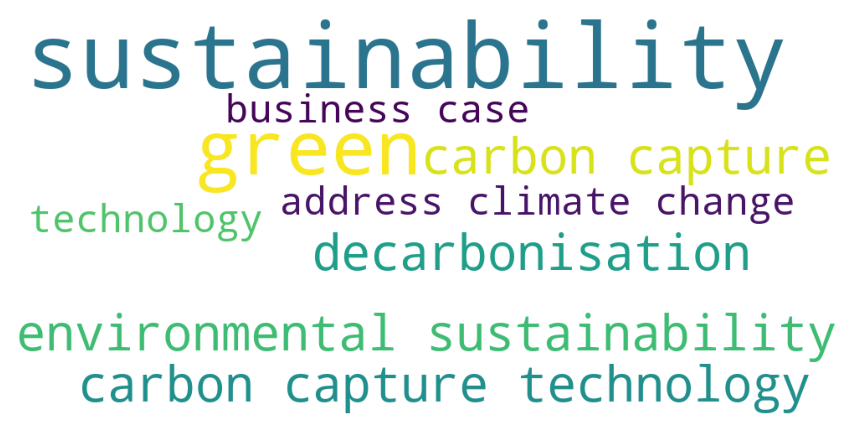

In [6]:
word_cloud(text)